# Method1 Huffman encoding

## Import Libraries

In [1]:
import mne
import numpy as np
from scipy.fft import fft,fftshift
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from scipy.signal import freqz
from scipy import signal
from sklearn.metrics import mean_squared_error
from math import sqrt
import os
import pandas as pd

In [2]:
eda = pd.read_csv('EDA.csv')
eda = eda.iloc[1:]
np.savetxt('eda.txt',eda)
eda_array = eda.to_numpy() 
eda_array = eda_array[0:7700]  # Cut the siganl to get rid of most of useless part
sampling_freq = 1/4
N = eda_array.size
index = np.linspace(0, round((N-1)*sampling_freq,4), N)

## Butterworth Band pass Filter

In [3]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

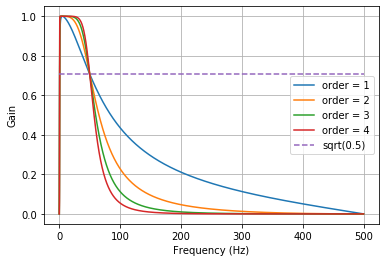

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 1000.0
lowcut = 0.5
highcut = 50.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [1, 2, 3, 4]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

In [5]:
# To implement the filter on signal
y = butter_bandpass_filter(eda_array, lowcut, highcut, fs, order=2)

In [6]:
resampled_signal = y #It's not necessary to resample in this method for this signal
np.savetxt('processed_eda.txt',resampled_signal)

## Round the data and then do Huffman coding

In [12]:
round_signal = np.around(resampled_signal,3) 
np.savetxt('eda_signal_rounded.txt',round_signal,fmt='%.3f')

In [13]:
os.system('eda_signal_rounded.txt')

32512

You could find a file name "signal_rounded.txt.huffman" in the current directory

### After this step, you could calculate the compression ratio if you want

## Decode the data

In [14]:
os.system('tcmpr -d eda_signal_rounded.txt.huffman')
decoded_data = np.loadtxt(fname = "eda_signal_rounded.txt")
decoded_data =decoded_data[..., np.newaxis]

#### PRD calculation:


In [15]:
#resampled_signal_ori = signal.resample(ECG_array, 564001)

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy import signal
# original_signal = normalized_signal
# compressed_signal = decoded_data
def PRD_calculation(original_signal, compressed_signal):
    PRD = sqrt(sum((original_signal-compressed_signal)**2)/(sum(original_signal**2)))
    return PRD

PRD = PRD_calculation(resampled_signal, decoded_data)
print("The PRD is {}%".format(round(PRD*100,3)))

The PRD is 0.488%
